# Rolling and Expanding

A common process with time series is to create data based off of a rolling mean. The idea is to divide the data into "windows" of time, and then calculate an aggregate function for each window. In this way we obtain a <em>simple moving average</em>.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('starbucks.csv', index_col='Date', parse_dates=True)

In [3]:
df

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548
...,...,...
2018-12-24,60.5600,6323252
2018-12-26,63.0800,16646238
2018-12-27,63.2000,11308081


<AxesSubplot:xlabel='Date'>

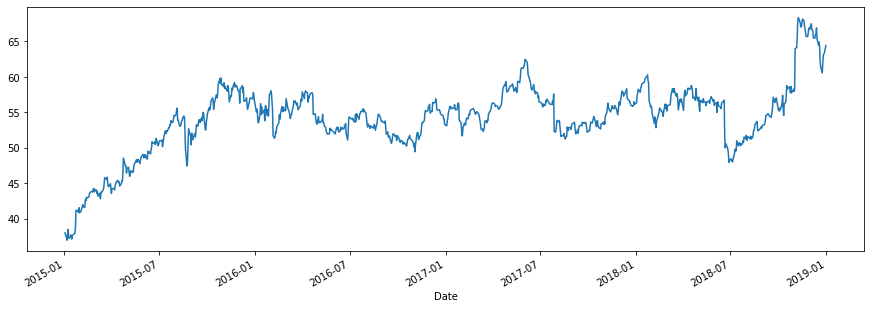

In [11]:
df['Close'].plot(figsize=(15,5))

In [7]:
# 7 day rolling mean

df.rolling(window=7).mean().head(15)

# 2015-01-12 represents 2015-01-02--2015-01-12

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,NaN,NaN
2015-01-07,NaN,NaN
2015-01-08,NaN,NaN
2015-01-09,NaN,NaN
2015-01-12,37.616786,1.238222e+07
2015-01-13,37.578786,1.297288e+07
2015-01-14,37.614786,1.264020e+07


<AxesSubplot:xlabel='Date'>

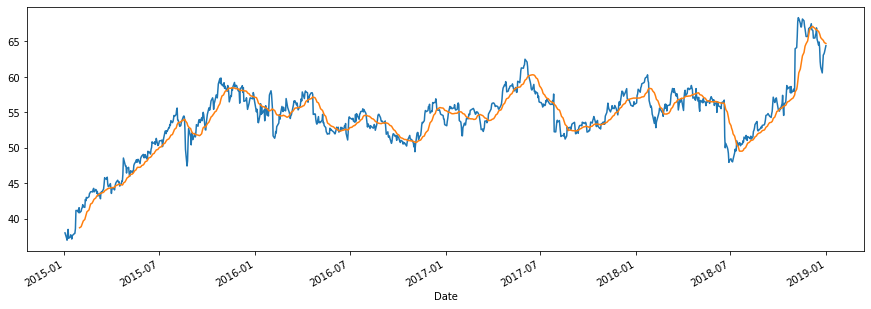

In [12]:
df['Close'].plot(figsize=(15,5))
df.rolling(window=20).mean()['Close'].plot()

In [13]:
df['Close: 20 Day Mean'] = df['Close'].rolling(window=20).mean()

In [14]:
df

,Close,Volume,Close: 20 Day Mean
Date,,,
2015-01-02,38.0061,6906098,NaN
2015-01-05,37.2781,11623796,NaN
2015-01-06,36.9748,7664340,NaN
2015-01-07,37.8848,9732554,NaN
2015-01-08,38.4961,13170548,NaN
...,...,...,...
2018-12-24,60.5600,6323252,65.2850
2018-12-26,63.0800,16646238,65.1545
2018-12-27,63.2000,11308081,65.0105


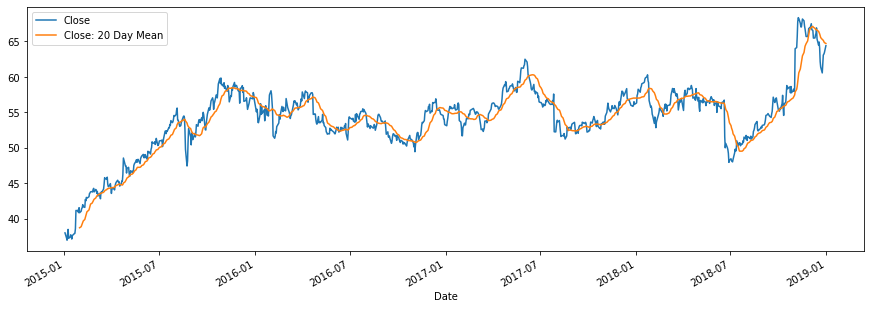

In [16]:
df[['Close', 'Close: 20 Day Mean']].plot(figsize=(15,5));

## Expanding

Instead of calculating values for a rolling window of dates, what if you wanted to take into account everything from the start of the time series up to each point in time? For example, instead of considering the average over the last 7 days, we would consider all prior data in our expanding set of averages.

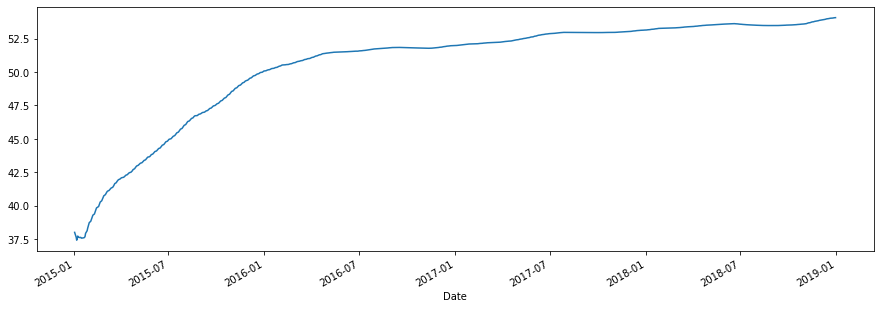

In [18]:
df['Close'].expanding().mean().plot(figsize=(15,5));

That's it! It doesn't help much to visualize an expanding operation against the daily data, since all it really gives us is a picture of the "stability" or "volatility" of a stock. However, if you do want to see it, simply uncomment the first plot line above and rerun the cell.